In [19]:
import pandas as pd
import matplotlib.pyplot as plt 

In [20]:
#load the data set 
df = pd.read_excel("data-sell4all.xlsx")

#print the first 5 rows
print(df.head())



      Pays Age   Genre Dépenses des clients
0   France  32  Female               150.50
1  Germany  45    Male               200.75
2    Spain  28  Female                75.25
3    Italy  39    Male               180.00
4       UK  52  Female               250.30


In [21]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1   Age                   63 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  64 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


In [22]:
print("nobmres des lignes : 65")
print("nombres des colomnes : 4")
print("data types : objects ")

nobmres des lignes : 65
nombres des colomnes : 4
data types : objects 


In [23]:
df.columns = df.columns.str.strip()


In [24]:

df['Age'] = pd.to_numeric(df['Age'],errors ='coerce')
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'],errors ='coerce')
df_fil = df[df['Dépenses des clients'] >= 10]
df_fil = df[df['Age'] > 0]
df_fil= df.dropna(subset=['Dépenses des clients'])
df_fil = df[df['Genre'].isin(['Female', 'Male'])]
df_cleaned = df_fil.drop_duplicates()



In [25]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()

median_spend = df['Dépenses des clients'].median()
mean_spend = df['Dépenses des clients'].mean()

print(f"Median age: {median_age}, Moyenne age: {mean_age}")
print(f"Médiane des dépenses: {median_spend}, Moyenne des dépenses: {mean_spend}")


Median age: 36.0, Moyenne age: 52.42372881355932
Médiane des dépenses: 167.5, Moyenne des dépenses: 34811.72948275862


In [26]:

dpp = df_cleaned.groupby('Pays')['Dépenses des clients'].sum()


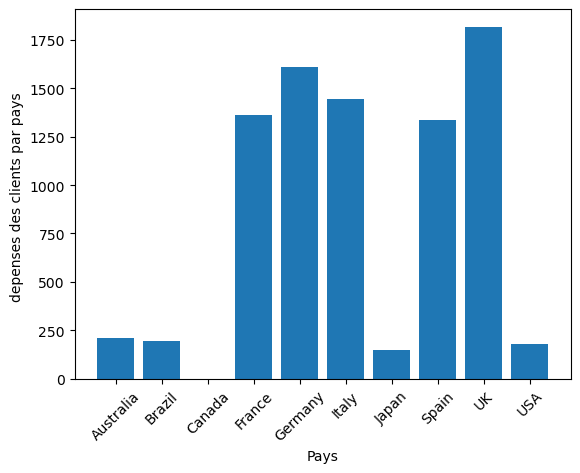

In [27]:

plt.bar(dpp.index,dpp.values)
plt.xlabel('Pays')
plt.ylabel('depenses des clients par pays ')
plt.xticks(rotation = 45)
plt.show()

In [28]:
df_cleaned.to_csv('dataset-sell4all_cleaned.csv', index=False)